# **Import libraries**

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

# **Read data using OS**

In [3]:
def load_data(data_directory):
    images = []
    labels = [] 
    classes = []
    label_encoder = LabelEncoder()
# iterating over classes in a directory, then iterating over the images within each class
    for class_name in os.listdir(data_directory):
        class_path = os.path.join(data_directory, class_name)
        classes.append(class_name)

        for filename in os.listdir(class_path):
            filepath = os.path.join(class_path, filename)
            img = cv2.imread(filepath)
 # Data Processing: 
# 1)resizing the images to (224, 224),
# 2)dividing by 255 to normalize pixel values, and converting to RGB.                     
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img = cv2.resize(img, (224, 224))
                img = img / 255.0
                images.append(img)
                labels.append(class_name)

    images = np.array(images)
    labels = label_encoder.fit_transform(labels) 

    return images, labels, classes

# **Update the path to dataset**

In [4]:
data_directory = '/kaggle/input/jellyfish-types'
images, labels, classes =load_data(data_directory)

# **train_test_split**

In [5]:
X_train, X_test ,y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# **dataset statistics**

In [6]:
X_train.shape

(720, 224, 224, 3)

In [7]:
np.unique(classes)

array(['Moon_jellyfish', 'Train_Test_Valid', 'barrel_jellyfish',
       'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish',
       'mauve_stinger_jellyfish'], dtype='<U23')

# **Plot the distribution**

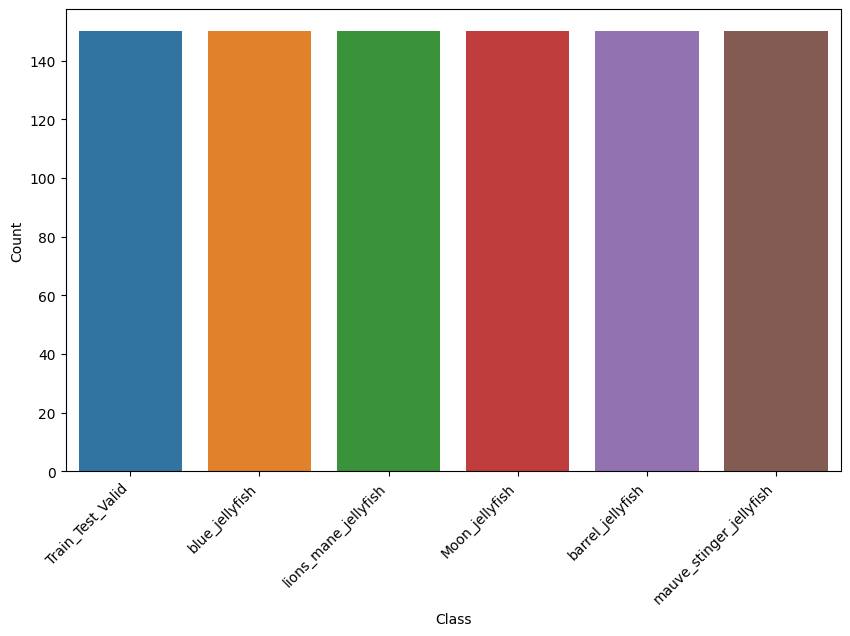

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x=[classes[label] for label in labels])  
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# **image show**

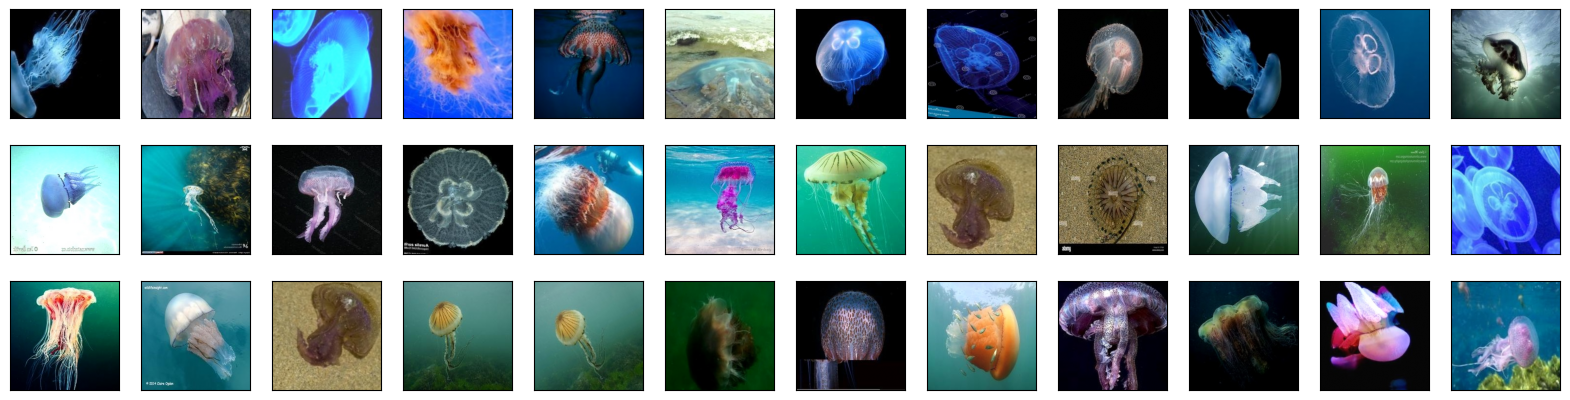

In [9]:
fig = plt.figure(figsize=(20,5))

for i in range(36):
    ax = fig.add_subplot(3,12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

# **model**

In [10]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

In [11]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
          
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
          
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(.3)) 
          
model.add(Flatten())
model.add(Dense(255, activation='relu')) 
model.add(Dropout(.3))          
model.add(Dense(6, activation='softmax'))  
          
model.summary()      

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [12]:
model.compile(loss='categorical_crossentropy',  metrics =['accuracy'])

In [13]:
model.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
23/23 [==============================] - 22s 895ms/step - loss: 2.5151 - accuracy: 0.2694 - val_loss: 1.5456 - val_accuracy: 0.3833
Epoch 2/5
23/23 [==============================] - 20s 857ms/step - loss: 1.4225 - accuracy: 0.4458 - val_loss: 1.3423 - val_accuracy: 0.4944
Epoch 3/5
23/23 [==============================] - 19s 821ms/step - loss: 1.2142 - accuracy: 0.5319 - val_loss: 1.5625 - val_accuracy: 0.4500
Epoch 4/5
23/23 [==============================] - 19s 848ms/step - loss: 1.1038 - accuracy: 0.5972 - val_loss: 1.5319 - val_accuracy: 0.4389
Epoch 5/5
23/23 [==============================] - 19s 831ms/step - loss: 0.9654 - accuracy: 0.6611 - val_loss: 1.2481 - val_accuracy: 0.5500


In [14]:
model.compile(loss='categorical_crossentropy', optimizer = 'Nadam', metrics =['accuracy'])

In [15]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=500,epochs=20)

Epoch 1/20
2/2 [==============================] - 24s 8s/step - loss: 0.7901 - accuracy: 0.7208 - val_loss: 1.0471 - val_accuracy: 0.6111
Epoch 2/20
2/2 [==============================] - 18s 7s/step - loss: 0.7134 - accuracy: 0.7486 - val_loss: 1.2169 - val_accuracy: 0.5722
Epoch 3/20
2/2 [==============================] - 19s 8s/step - loss: 0.7486 - accuracy: 0.7194 - val_loss: 0.9807 - val_accuracy: 0.6444
Epoch 4/20
2/2 [==============================] - 18s 7s/step - loss: 0.5734 - accuracy: 0.8292 - val_loss: 0.9487 - val_accuracy: 0.6333
Epoch 5/20
2/2 [==============================] - 18s 7s/step - loss: 0.5145 - accuracy: 0.8417 - val_loss: 1.0435 - val_accuracy: 0.6000
Epoch 6/20
2/2 [==============================] - 18s 7s/step - loss: 0.5357 - accuracy: 0.8097 - val_loss: 1.1767 - val_accuracy: 0.6222
Epoch 7/20
2/2 [==============================] - 50s 20s/step - loss: 0.5190 - accuracy: 0.8389 - val_loss: 0.9136 - val_accuracy: 0.7000
Epoch 8/20
2/2 [=================

In [16]:
y_hat = model.predict(X_test)
test = model.evaluate(X_test, y_test)
print('Test Loss = ', test[0], 'Test Accuracy = ', test[1])

6/6 [==============================] - 1s 201ms/step - loss: 0.8658 - accuracy: 0.7111
Test Loss =  0.8657586574554443 Test Accuracy =  0.7111111283302307


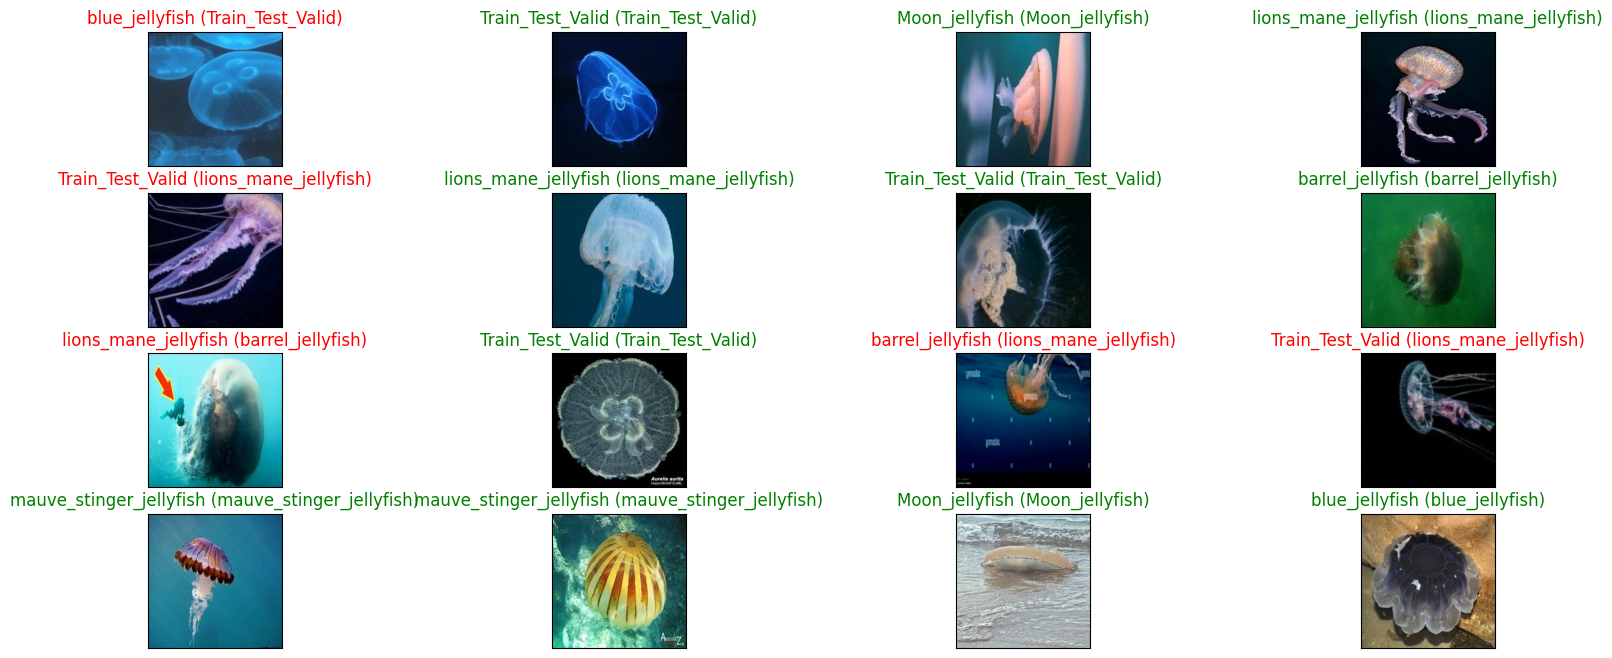

In [17]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(classes[pred_idx], classes[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

# **phase 2**


In [18]:
import tensorflow as tf
import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

In [19]:
datagen = ImageDataGenerator(
    rotation_range=30,         # Randomly rotate images by 20 degrees
    #brightness_range=[0., 0.5],  # Adjust brightness between 10% and 200%
    width_shift_range=0.1,     # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.1,    # Randomly shift images vertically by 20% of the height
    zoom_range=0.3,            # Randomly zoom into images
    horizontal_flip=True,      # Randomly flip images horizontally
    vertical_flip=True,        # Randomly flip images vertically
)
datagen1 = ImageDataGenerator()

train_generator = datagen.flow(X_train, y_train, batch_size=20)
val_generator = datagen1.flow(X_test, y_test, batch_size=20)

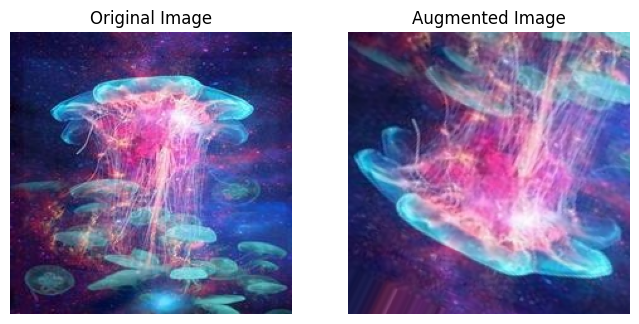

In [20]:
index = np.random.randint(0, len(X_train))

# Select the original image
original_image = (X_train[index]*255).astype(np.uint8)
original_image = original_image.astype(np.uint8)

# Reshape the selected image to (1, height, width, channels) to make it a batch of size 1
original_image = np.expand_dims(original_image, axis=0)

# Create an iterator for the batch (with only one sample)
iterator = datagen.flow(original_image, batch_size=1)

# Generate augmented images
augmented_images = (iterator.next()).astype(np.uint8)

# Display the original and augmented images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image[0])
plt.axis('off')

# Augmented image
plt.subplot(1, 2, 2)
plt.title('Augmented Image')
plt.imshow(augmented_images[0] ,vmax = 1., vmin = 0)
plt.axis('off')

plt.show()

In [21]:
history = model.fit(train_generator, epochs=100, validation_data=val_generator)

Epoch 1/100
36/36 [==============================] - 28s 733ms/step - loss: 1.3189 - accuracy: 0.4778 - val_loss: 1.1665 - val_accuracy: 0.5889
Epoch 2/100
36/36 [==============================] - 28s 781ms/step - loss: 1.1627 - accuracy: 0.5361 - val_loss: 0.9429 - val_accuracy: 0.6111
Epoch 3/100
36/36 [==============================] - 27s 755ms/step - loss: 1.0588 - accuracy: 0.5931 - val_loss: 0.9226 - val_accuracy: 0.7222
Epoch 4/100
36/36 [==============================] - 27s 745ms/step - loss: 1.0240 - accuracy: 0.6069 - val_loss: 1.0036 - val_accuracy: 0.6278
Epoch 5/100
36/36 [==============================] - 26s 723ms/step - loss: 1.0089 - accuracy: 0.6167 - val_loss: 0.9275 - val_accuracy: 0.6389
Epoch 6/100
36/36 [==============================] - 26s 709ms/step - loss: 0.9786 - accuracy: 0.6278 - val_loss: 0.9551 - val_accuracy: 0.6333
Epoch 7/100
36/36 [==============================] - 25s 701ms/step - loss: 0.8950 - accuracy: 0.6444 - val_loss: 0.9673 - val_accuracy:

In [22]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Find the epoch with the highest validation accuracy
best_epoch = val_accuracy.index(max(val_accuracy)) + 1  # Add 1 because epochs are 1-indexed

print(f"Best Accuracy: {accuracy[best_epoch-1]:.4f} at Epoch {best_epoch}")
print(f"Best Validation Accuracy: {val_accuracy[best_epoch-1]:.4f} at Epoch {best_epoch}")

Best Accuracy: 0.9417 at Epoch 91
Best Validation Accuracy: 0.9222 at Epoch 91


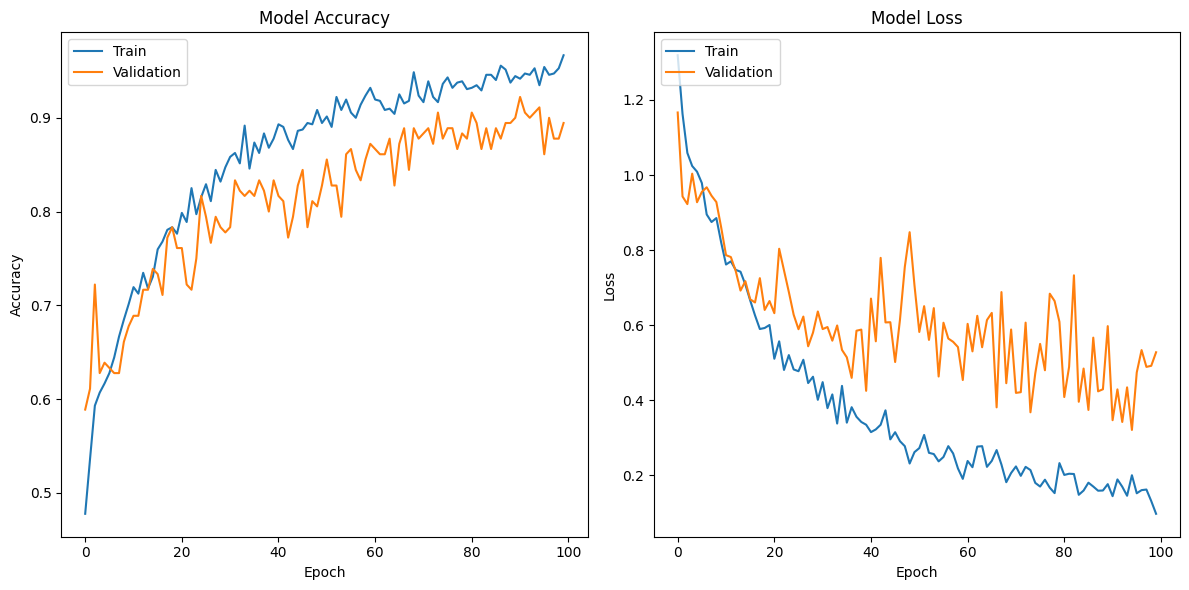

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

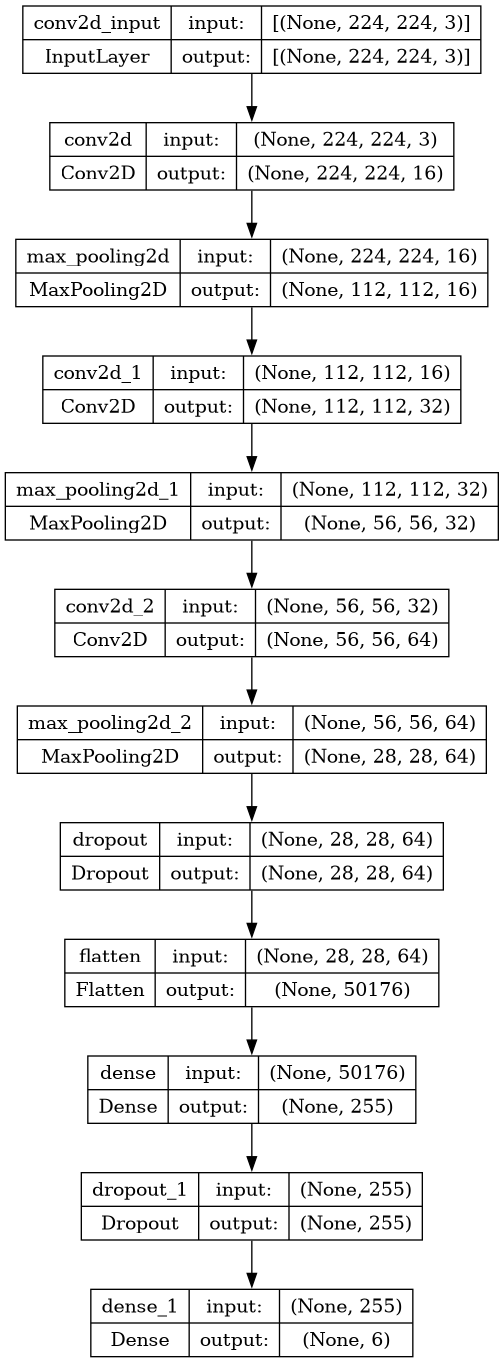

In [24]:
from keras.utils import plot_model

# Assuming this is the original Sequential model you defined
plot_model(model, to_file='sequential_model_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/5
23/23 [==============================] - 49s 2s/step - loss: 0.0522 - accuracy: 0.9792 - val_loss: 0.7053 - val_accuracy: 0.8611 - lr: 0.0010
Epoch 2/5
23/23 [==============================] - 21s 899ms/step - loss: 0.0357 - accuracy: 0.9875 - val_loss: 0.7394 - val_accuracy: 0.8611 - lr: 0.0010
Epoch 3/5
23/23 [==============================] - 18s 794ms/step - loss: 0.0280 - accuracy: 0.9917 - val_loss: 0.5250 - val_accuracy: 0.9056 - lr: 0.0010
Epoch 4/5
23/23 [==============================] - 17s 762ms/step - loss: 0.0239 - accuracy: 0.9889 - val_loss: 0.5143 - val_accuracy: 0.9056 - lr: 0.0010
Epoch 5/5
23/23 [==============================] - 18s 785ms/step - loss: 0.0180 - accuracy: 0.9931 - val_loss: 0.5680 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 1/20
2/2 [==============================] - 23s 7s/step - loss: 0.0252 - accuracy: 0.9917 - val_loss: 0.5400 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 2/20
2/2 [==============================] - 17s 6s/step - loss: 0.0102 

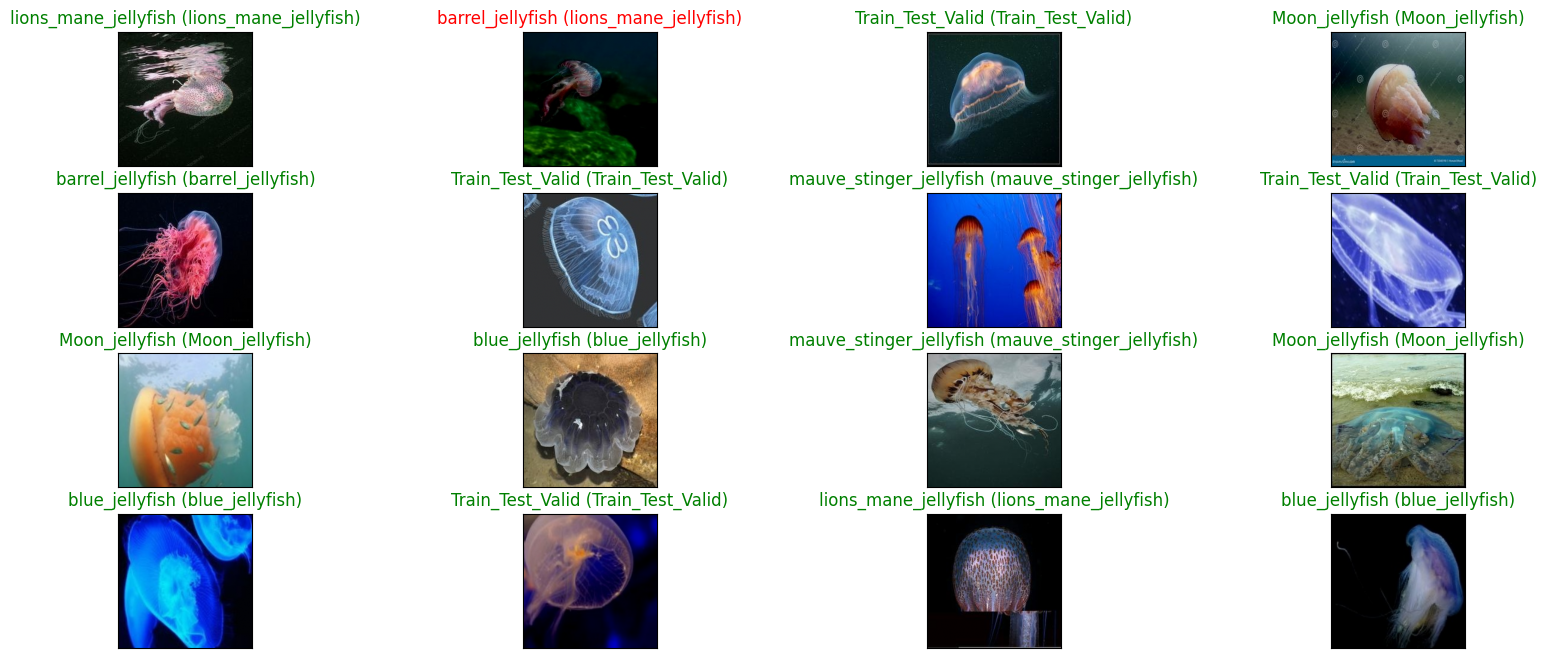

In [25]:
from keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=1e-6)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=500, epochs=20, callbacks=[lr_scheduler])

y_hat = model.predict(X_test)
test = model.evaluate(X_test, y_test)
print('Test Loss = ', test[0], 'Test Accuracy = ', test[1])

fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(classes[pred_idx], classes[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))    

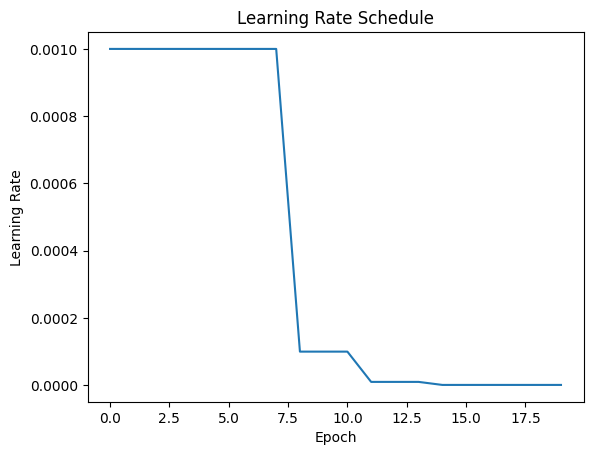

In [26]:
# Extract learning rate values from the history object
learning_rate = history.history['lr']

# Plot learning rate schedule
plt.plot(learning_rate)
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()


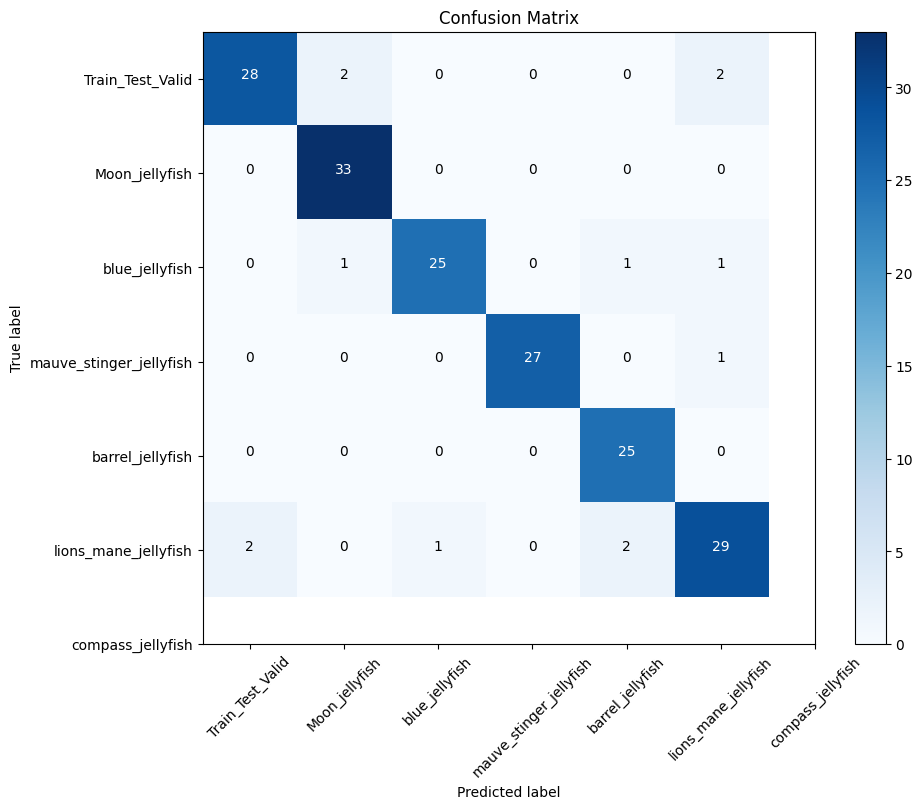

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# Compute confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_hat, axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:

# Define AlexNet model
def create_alexnet_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        Conv2D(filters=256, kernel_size=(5,5), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'),
        Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'),
        Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(3,3), strides=(2,2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model


 
# Load data and preprocess
data_directory = '/kaggle/input/jellyfish-types'
images, labels, classes = load_data(data_directory)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

model.summary()    



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [29]:
# Define and compile AlexNet model
alexnet_model = create_alexnet_model(input_shape=(224, 224, 3), num_classes=6)
alexnet_model.compile(optimizer= 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train AlexNet model
alexnet_history = alexnet_model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test))



Epoch 1/20
6/6 [==============================] - 54s 9s/step - loss: 4.0740 - accuracy: 0.1597 - val_loss: 1.7895 - val_accuracy: 0.1556
Epoch 2/20
6/6 [==============================] - 50s 8s/step - loss: 1.7861 - accuracy: 0.1931 - val_loss: 1.7788 - val_accuracy: 0.2222
Epoch 3/20
6/6 [==============================] - 52s 9s/step - loss: 1.7641 - accuracy: 0.2847 - val_loss: 1.7158 - val_accuracy: 0.2389
Epoch 4/20
6/6 [==============================] - 71s 12s/step - loss: 1.7400 - accuracy: 0.2833 - val_loss: 1.7306 - val_accuracy: 0.2500
Epoch 5/20
6/6 [==============================] - 51s 8s/step - loss: 1.6903 - accuracy: 0.2625 - val_loss: 1.6540 - val_accuracy: 0.3000
Epoch 6/20
6/6 [==============================] - 53s 9s/step - loss: 1.5646 - accuracy: 0.3306 - val_loss: 1.5810 - val_accuracy: 0.2778
Epoch 7/20
6/6 [==============================] - 50s 8s/step - loss: 1.5127 - accuracy: 0.3472 - val_loss: 1.5544 - val_accuracy: 0.3278
Epoch 8/20
6/6 [=================

In [30]:
# Extract accuracy, validation accuracy, and validation loss from the history
accuracy = alexnet_history.history['accuracy']
val_accuracy = alexnet_history.history['val_accuracy']

# Find the epoch with the highest accuracy
best_accuracy_epoch = accuracy.index(max(accuracy)) + 1

# Find the epoch with the highest validation accuracy
best_val_accuracy_epoch = val_accuracy.index(max(val_accuracy)) + 1

# Print the best accuracy and its corresponding epoch
print(f"Best Accuracy: {accuracy[best_accuracy_epoch-1]:.4f} at Epoch {best_accuracy_epoch}")

# Print the best validation accuracy and its corresponding epoch
print(f"Best Validation Accuracy: {val_accuracy[best_val_accuracy_epoch-1]:.4f} at Epoch {best_val_accuracy_epoch}")

Best Accuracy: 0.7083 at Epoch 20
Best Validation Accuracy: 0.5056 at Epoch 16


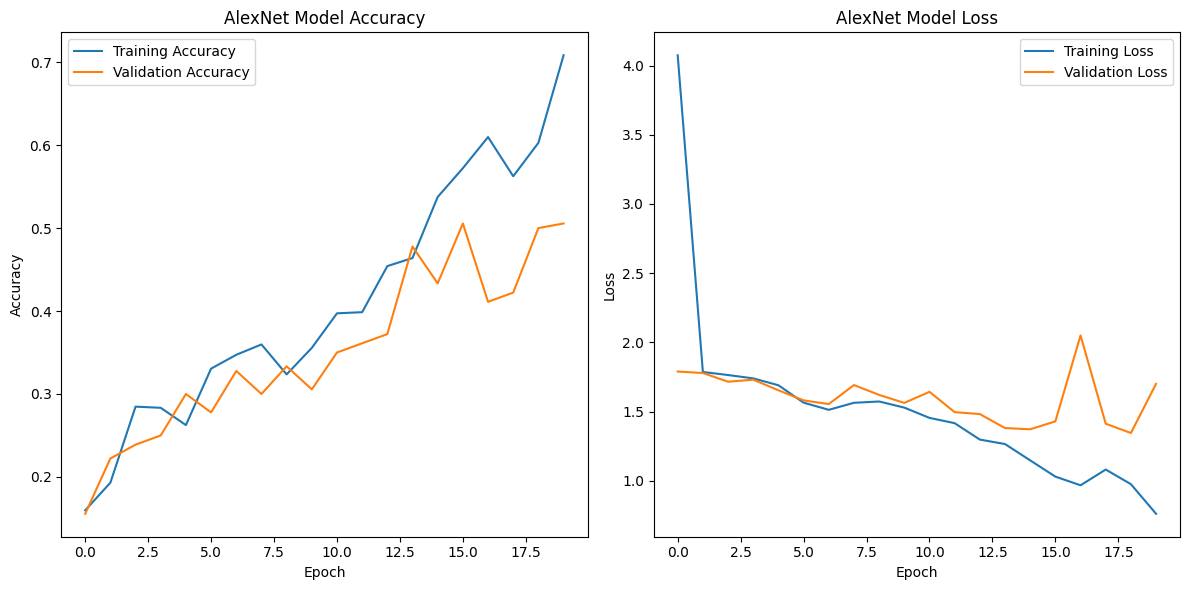

In [31]:

# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(alexnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(alexnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('AlexNet Model Accuracy')
plt.legend()

# Plot training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(alexnet_history.history['loss'], label='Training Loss')
plt.plot(alexnet_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('AlexNet Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

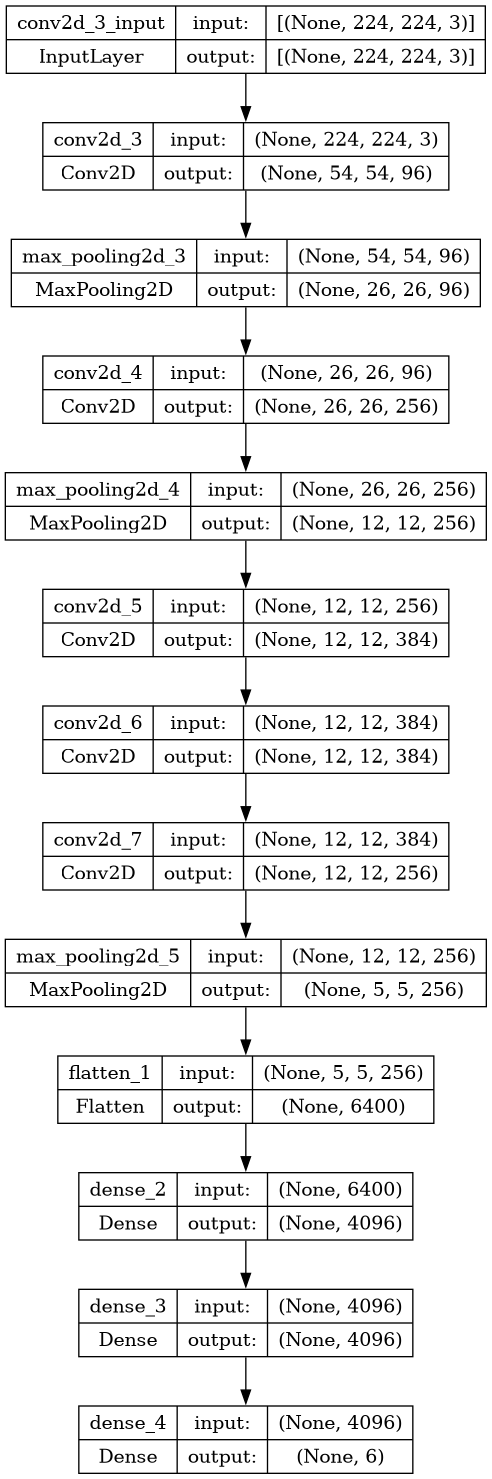

In [32]:
from keras.utils import plot_model

# Assuming this is the variable name of your AlexNet model
plot_model(alexnet_model, to_file='alexnet_model_plot.png', show_shapes=True, show_layer_names=True)

In [33]:
# Define ConvNet Tiny model
def create_convnet_tiny_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Load data and preprocess (if not already loaded)
data_directory = '/kaggle/input/jellyfish-types'
images, labels, classes = load_data(data_directory)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

model.summary()    


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [34]:
# Define and compile ConvNet Tiny model
convnet_tiny_model = create_convnet_tiny_model(input_shape=(224, 224, 3), num_classes=6)
convnet_tiny_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train ConvNet Tiny model
convnet_tiny_history = convnet_tiny_model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_test, y_test))


Epoch 1/15
6/6 [==============================] - 70s 12s/step - loss: 2.3653 - accuracy: 0.2097 - val_loss: 1.7219 - val_accuracy: 0.2389
Epoch 2/15
6/6 [==============================] - 36s 6s/step - loss: 1.6652 - accuracy: 0.3000 - val_loss: 1.6359 - val_accuracy: 0.2778
Epoch 3/15
6/6 [==============================] - 40s 7s/step - loss: 1.4321 - accuracy: 0.4375 - val_loss: 1.4824 - val_accuracy: 0.4000
Epoch 4/15
6/6 [==============================] - 37s 6s/step - loss: 1.1734 - accuracy: 0.5556 - val_loss: 1.3644 - val_accuracy: 0.4444
Epoch 5/15
6/6 [==============================] - 37s 6s/step - loss: 0.9932 - accuracy: 0.6181 - val_loss: 1.2440 - val_accuracy: 0.5611
Epoch 6/15
6/6 [==============================] - 37s 6s/step - loss: 0.8693 - accuracy: 0.6861 - val_loss: 1.2075 - val_accuracy: 0.5500
Epoch 7/15
6/6 [==============================] - 39s 7s/step - loss: 0.6381 - accuracy: 0.7833 - val_loss: 1.2436 - val_accuracy: 0.5889
Epoch 8/15
6/6 [=================

In [35]:
# Extract accuracy, validation accuracy, and validation loss from the history
convnet_tiny_accuracy = convnet_tiny_history.history['accuracy']
convnet_tiny_val_accuracy = convnet_tiny_history.history['val_accuracy']

# Find the epoch with the highest accuracy
best_convnet_tiny_accuracy_epoch = convnet_tiny_accuracy.index(max(convnet_tiny_accuracy)) + 1

# Find the epoch with the highest validation accuracy
best_convnet_tiny_val_accuracy_epoch = convnet_tiny_val_accuracy.index(max(convnet_tiny_val_accuracy)) + 1

# Print the best accuracy and its corresponding epoch
print(f"Best Accuracy for ConvNet Tiny: {convnet_tiny_accuracy[best_convnet_tiny_accuracy_epoch-1]:.4f} at Epoch {best_convnet_tiny_accuracy_epoch}")

# Print the best validation accuracy and its corresponding epoch
print(f"Best Validation Accuracy for ConvNet Tiny: {convnet_tiny_val_accuracy[best_convnet_tiny_val_accuracy_epoch-1]:.4f} at Epoch {best_convnet_tiny_val_accuracy_epoch}")

Best Accuracy for ConvNet Tiny: 0.9889 at Epoch 13
Best Validation Accuracy for ConvNet Tiny: 0.6444 at Epoch 12


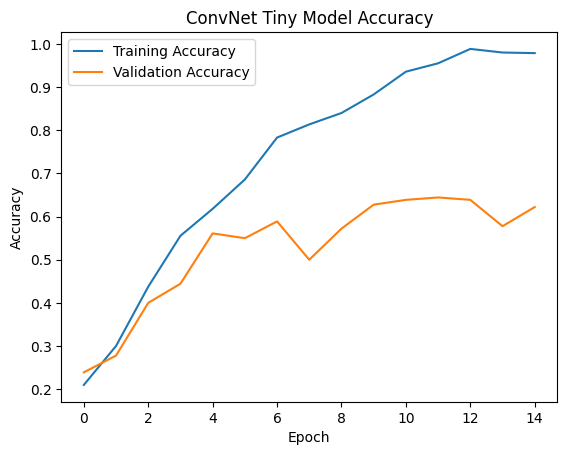

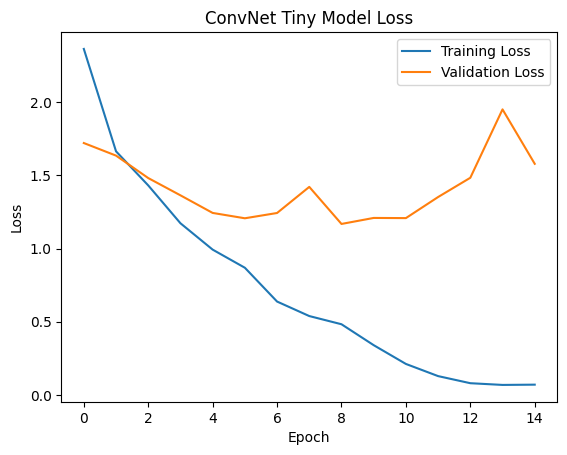

In [36]:
# Extract loss and validation loss from the history
convnet_tiny_loss = convnet_tiny_history.history['loss']
convnet_tiny_val_loss = convnet_tiny_history.history['val_loss']

# Find the epoch with the lowest loss
best_convnet_tiny_loss_epoch = convnet_tiny_loss.index(min(convnet_tiny_loss)) + 1

# Plot training and validation accuracy over epochs
plt.plot(convnet_tiny_history.history['accuracy'], label='Training Accuracy')
plt.plot(convnet_tiny_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ConvNet Tiny Model Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.plot(convnet_tiny_loss, label='Training Loss')
plt.plot(convnet_tiny_val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ConvNet Tiny Model Loss')
plt.legend()
plt.show()



In [37]:
# Extract accuracy, validation accuracy, and validation loss from the history
convnet_tiny_accuracy = convnet_tiny_history.history['accuracy']
convnet_tiny_val_accuracy = convnet_tiny_history.history['val_accuracy']

# Find the epoch with the highest accuracy
best_convnet_tiny_accuracy_epoch = convnet_tiny_accuracy.index(max(convnet_tiny_accuracy)) + 1

# Find the epoch with the highest validation accuracy
best_convnet_tiny_val_accuracy_epoch = convnet_tiny_val_accuracy.index(max(convnet_tiny_val_accuracy)) + 1

# Print the best accuracy and its corresponding epoch
print(f"Best Accuracy for ConvNet Tiny: {convnet_tiny_accuracy[best_convnet_tiny_accuracy_epoch-1]:.4f} at Epoch {best_convnet_tiny_accuracy_epoch}")

# Print the best validation accuracy and its corresponding epoch
print(f"Best Validation Accuracy for ConvNet Tiny: {convnet_tiny_val_accuracy[best_convnet_tiny_val_accuracy_epoch-1]:.4f} at Epoch {best_convnet_tiny_val_accuracy_epoch}")


Best Accuracy for ConvNet Tiny: 0.9889 at Epoch 13
Best Validation Accuracy for ConvNet Tiny: 0.6444 at Epoch 12


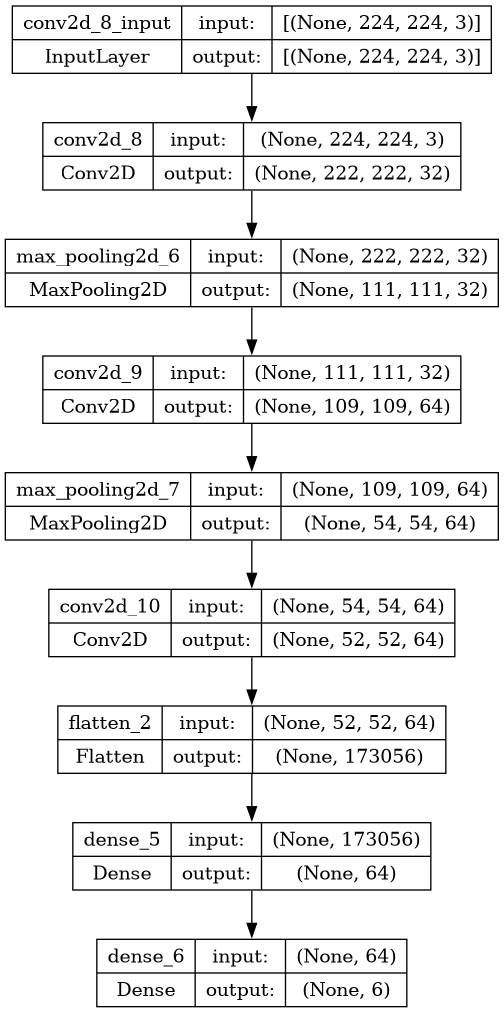

In [38]:
from keras.utils import plot_model

# Assuming this is the variable name of the ConvNet Tiny model
plot_model(convnet_tiny_model, to_file='convnet_tiny_model_plot.png', show_shapes=True, show_layer_names=True)

In [39]:
# Define another VGGNet model
def create_another_vggnet_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
        
    ])
    return model

  



In [40]:

# Define the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 6

# Create and compile another VGGNet model
another_vggnet_model = create_another_vggnet_model(input_shape, num_classes)
another_vggnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

another_vggnet_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 128)      

In [41]:
# Train the model
another_vggnet_history = another_vggnet_model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/15
6/6 [==============================] - 45s 7s/step - loss: 2.4616 - accuracy: 0.1778 - val_loss: 1.7428 - val_accuracy: 0.2611
Epoch 2/15
6/6 [==============================] - 73s 13s/step - loss: 1.5986 - accuracy: 0.3083 - val_loss: 1.5050 - val_accuracy: 0.3833
Epoch 3/15
6/6 [==============================] - 42s 7s/step - loss: 1.3041 - accuracy: 0.4750 - val_loss: 1.4217 - val_accuracy: 0.4389
Epoch 4/15
6/6 [==============================] - 43s 7s/step - loss: 1.1535 - accuracy: 0.5375 - val_loss: 1.2748 - val_accuracy: 0.4556
Epoch 5/15
6/6 [==============================] - 42s 7s/step - loss: 1.0105 - accuracy: 0.6250 - val_loss: 1.2257 - val_accuracy: 0.4667
Epoch 6/15
6/6 [==============================] - 42s 7s/step - loss: 0.8956 - accuracy: 0.6736 - val_loss: 1.1983 - val_accuracy: 0.5556
Epoch 7/15
6/6 [==============================] - 42s 7s/step - loss: 0.7233 - accuracy: 0.7403 - val_loss: 1.0930 - val_accuracy: 0.5722
Epoch 8/15
6/6 [=================

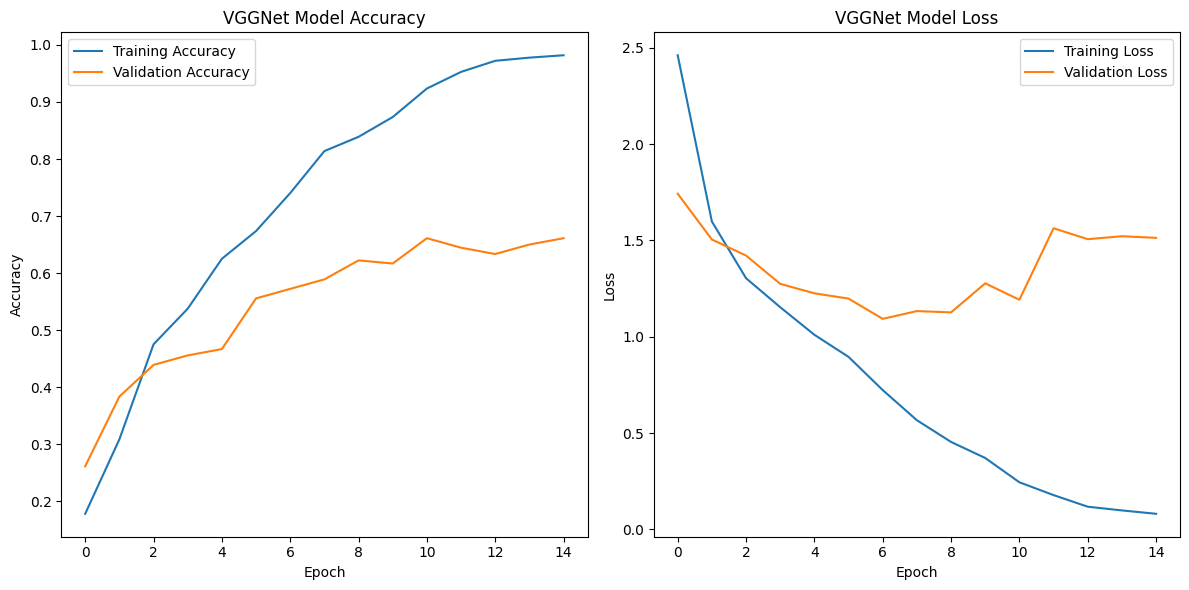

In [42]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(another_vggnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(another_vggnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('VGGNet Model Accuracy')
plt.legend()

# Plot training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(another_vggnet_history.history['loss'], label='Training Loss')
plt.plot(another_vggnet_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('VGGNet Model Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [43]:
# Extract accuracy and validation accuracy from the history
accuracy = another_vggnet_history.history['accuracy']
val_accuracy = another_vggnet_history.history['val_accuracy']

# Find the epoch with the highest accuracy
best_accuracy_epoch = accuracy.index(max(accuracy)) + 1

# Find the epoch with the highest validation accuracy
best_val_accuracy_epoch = val_accuracy.index(max(val_accuracy)) + 1

print(f"Best Accuracy: {accuracy[best_accuracy_epoch-1]:.4f} at Epoch {best_accuracy_epoch}")
print(f"Best Validation Accuracy: {val_accuracy[best_val_accuracy_epoch-1]:.4f} at Epoch {best_val_accuracy_epoch}")


Best Accuracy: 0.9819 at Epoch 15
Best Validation Accuracy: 0.6611 at Epoch 11


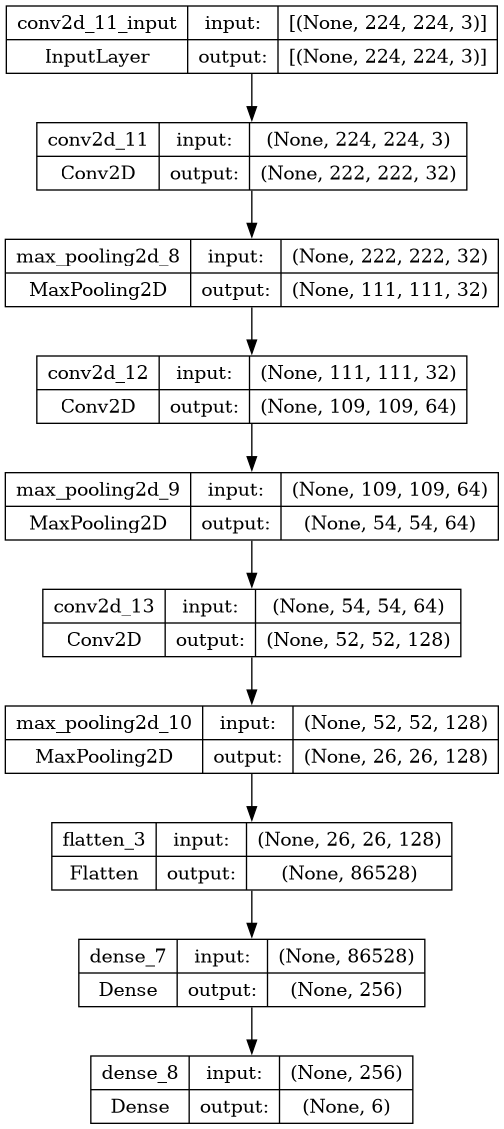

In [44]:
from keras.utils import plot_model

# Assuming this is the variable name of the VGGNet model
plot_model(another_vggnet_model, to_file='another_vggnet_model_plot.png', show_shapes=True, show_layer_names=True)
